# Neutrophil Counts

This code takes Neutrophil counts from men and women with deleted and duplicated genes and compare them vs. control samples.

1. plot distribution of NEUTc (wo)men del vs. cont vs. dup
2. calculate separation bewteen del and cont in men and women

## Librerie Utilizzate

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Caricamento Dati
Carico i dati in un DataFrame pandas utilizzando la funzione adatta

In [44]:
data = pd.read_csv("data/NEUTc.txt", index_col=0)
data

,ID,sex,CNV16p600kb,NEUTc
1,1000224,0,0,4.67
2,1000385,1,0,2.40
3,1001118,1,0,6.07
4,1001492,0,0,3.40
5,1003261,1,0,3.94
...,...,...,...,...
359040,6015512,1,0,3.14
359041,6016430,0,0,5.22
359042,6017303,1,0,4.11
359043,6024367,1,0,5.61


## Guardo i dati
Disegno la distribuzione dei conteggi dei neutrofili per il campione di controllo, duplicato e deleto.
Prima seleziono i campioni dal `DataFrame`:

In [35]:
men_del = data[(data['sex']==1) & (data['CNV16p600kb']==-1)]['NEUTc']
men_con = data[(data['sex']==1) & (data['CNV16p600kb']==0)]['NEUTc']
men_dup = data[(data['sex']==1) & (data['CNV16p600kb']==1)]['NEUTc']

Poi li disegno in un grafico

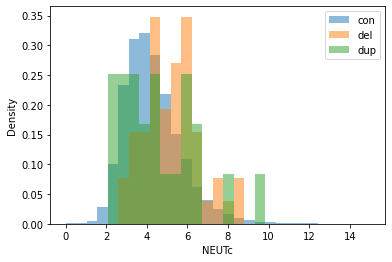

In [46]:
bins= np.linspace(0,15,30)
plt.hist(men_con,bins,alpha = 0.5,density=True,label='con')
plt.hist(men_del,bins,alpha = 0.5,density=True,label='del')
plt.hist(men_dup,bins,alpha = 0.5,density=True,label='dup')
plt.xlabel('NEUTc')
plt.ylabel('Density')
plt.legend()

Le distribuzioni di campione di controllo e duplicato sembrano simili, quella del campione deleto invece sembra differente. Ciò però non appare evidente se si calcolano media e deviazione standard delle misure

In [48]:
print('del: {:.2f} ± {:.2f}'.format(men_del.mean(),men_del.std()))
print('con: {:.2f} ± {:.2f}'.format(men_con.mean(),men_con.std()))
print('dup: {:.2f} ± {:.2f}'.format(men_dup.mean(),men_dup.std()))

del: 5.24 ± 1.35
con: 4.29 ± 1.43
dup: 4.58 ± 1.90


Concentriamoci su campione deleto e controllo

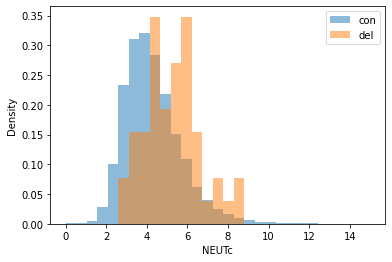

In [49]:
plt.hist(men_con,bins,alpha = 0.5,density=True,label='con')
plt.hist(men_del,bins,alpha = 0.5,density=True,label='del')
plt.xlabel('NEUTc')
plt.ylabel('Density')
plt.legend()

Si potrebbe effettuare un test del $\chi^2$ tra le due distribuzioni normalizzate

In [86]:
# fill array with bin counts
hcon = np.zeros(15)
hdel = np.zeros(15)
for i in men_con:
    if i >= 15: continue
    hcon[int(i)] += 1
for i in men_del:
    if i >= 15: continue
    hdel[int(i)] += 1
#print(hcon,hdel)
hcon_s = [np.sqrt(i) if i > 0 else 0 for i in hcon]
hdel_s = [np.sqrt(i) if i > 0 else 0 for i in hdel]
#print(hcon_s,hdel_s)
# normalize
hconN = hcon/hcon.sum()
hdelN = hdel/hdel.sum()
#print(hconN,hconN.sum(), hdelN, hdelN.sum())
hconN_s = hcon_s/hcon.sum()
hdelN_s = hdel_s/hdel.sum()
#print(hconN_s, hdelN_s)
# calcolo chi2
print('Calcolo chi2')
chi2v = 0
for i in range(15):
    chi2i = (hconN[i] - hdelN[i])**2 / ( hconN_s[i]**2 + hdelN_s[i]**2 )
    chi2v+=chi2i
    print('{}: con= {:.2e} ± {:.2e}\t del= {:.2e} ± {:.2e}\t chi2={:.2f}'.format(
    i, hconN[i], hconN_s[i], hdelN[i], hdelN_s[i], chi2i))
print('chi2 = {:.2f}'.format(chi2v))

Calcolo chi2
0: con= 1.59e-03 ± 9.76e-05	 del= 0.00e+00 ± 0.00e+00	 chi2=265.00
1: con= 1.36e-02 ± 2.85e-04	 del= 0.00e+00 ± 0.00e+00	 chi2=2260.00
2: con= 1.39e-01 ± 9.13e-04	 del= 4.00e-02 ± 2.83e-02	 chi2=12.23
3: con= 3.13e-01 ± 1.37e-03	 del= 1.40e-01 ± 5.29e-02	 chi2=10.67
4: con= 2.74e-01 ± 1.28e-03	 del= 3.00e-01 ± 7.75e-02	 chi2=0.11
5: con= 1.50e-01 ± 9.48e-04	 del= 2.80e-01 ± 7.48e-02	 chi2=3.03
6: con= 6.45e-02 ± 6.22e-04	 del= 1.40e-01 ± 5.29e-02	 chi2=2.04
7: con= 2.58e-02 ± 3.93e-04	 del= 6.00e-02 ± 3.46e-02	 chi2=0.98
8: con= 1.07e-02 ± 2.54e-04	 del= 4.00e-02 ± 2.83e-02	 chi2=1.07
9: con= 4.49e-03 ± 1.64e-04	 del= 0.00e+00 ± 0.00e+00	 chi2=749.00
10: con= 1.95e-03 ± 1.08e-04	 del= 0.00e+00 ± 0.00e+00	 chi2=326.00
11: con= 9.17e-04 ± 7.42e-05	 del= 0.00e+00 ± 0.00e+00	 chi2=153.00
12: con= 4.32e-04 ± 5.09e-05	 del= 0.00e+00 ± 0.00e+00	 chi2=72.00
13: con= 1.80e-04 ± 3.28e-05	 del= 0.00e+00 ± 0.00e+00	 chi2=30.00
14: con= 1.26e-04 ± 2.75e-05	 del= 0.00e+00 ± 0.00e+00	 ch

In [87]:
# test del chi2
from scipy.stats import chi2
d = 15
pchi2 = 1-chi2.cdf(chi2v,d)
print('P(chi2) = {}'.format(pchi2))

P(chi2) = 0.0


Non sono convinto che il test del $\chi2$ sia giusto o eseguito correttamente.

Oppure un t-test tra i campioni

In [51]:
from scipy.stats import ttest_ind
ttest_ind(men_del, men_con)

Ttest_indResult(statistic=4.717373212362895, pvalue=2.391021960032402e-06)